In [106]:
import numpy as np # библиотека для удобной работы с массивами
import pandas as pd # библиотека для удобной работы с датасетами
import matplotlib.pyplot as plt # библиотека для графики
import seaborn as sns # библиотека для отображения диаграмм
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge

In [107]:
# загрузка данных с Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
dataframe = pd.read_csv(
    '/content/drive/My Drive/II/kahut_project/dataset.csv', 
    sep=',', # что является разделителем колонок в файле,
    decimal='.' # что является разделителем десятичных дробей в записи чисел
)

# посмотрим на случайные 15 записей
dataframe.sample(15)

,profession_name,area,perspective
24,Software specialists,17,0.570
5,Air traffic controllers,6,0.500
25,Document Management Specialists,17,0.570
9,Computer Systems Engineers / Architects,10,0.580
4,Actors,5,0.500
14,Interior designers,13,0.600
2,Teachers,3,0.300
16,Graphic designers,13,0.520
29,Web developers,20,0.900
17,Computer Programmers,14,0.480


In [76]:
dataframe.describe()

,area,perspective
count,31.000000,31.000000
mean,12.096774,0.586226
std,5.424358,0.147414
min,1.000000,0.300000
25%,8.500000,0.525000
50%,13.000000,0.570000
75%,16.000000,0.600000
max,21.000000,0.900000


In [77]:
dataframe.groupby('area')['perspective'].count()

area
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    3
13    3
14    3
15    1
16    3
17    3
18    1
19    1
20    1
21    1
Name: perspective, dtype: int64

###### 1-statistician
######2-Seller
######3-educational services
######4-government
######5-art
######6-government
######7-agriculture
######8-Production
######9-Architect
######10-engineers
######11-architects
######12-managers
######13-designer
######14-programmer
######15-testers
######16-administrator
######17-specialist
######18-analyst
######19-strategist
######20-devloper
######21-helper

In [78]:
from sklearn.utils import shuffle

random_indices = shuffle(range(len(dataframe)), random_state=1)
train_indices = random_indices

## Из данного анализа видно, что в датасете не хватает ещё одного или нескольких столбцов
#### В дальнейшем добавим, но пока так

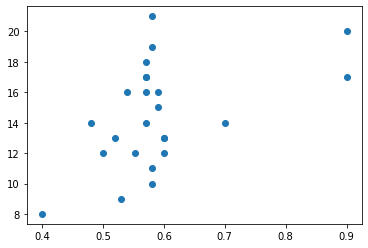

In [109]:
sliced = slice(len(train_indices) // 4, len(train_indices))
plt.scatter(dataframe['perspective'][sliced], dataframe['area'][sliced]);   # посмотреть как распределены данные

### Обучение нейронки

In [95]:
linear_model = LinearRegression().fit(
    dataframe.area.values[train_indices][sliced].reshape(-1, 1),
    dataframe.perspective[train_indices][sliced].values
)

### Получение предсказаний

In [104]:
def define(data):    # получить предсказание с помощью ранее обученной модели
  pred = linear_model.predict(data)
  print(pred)
  

In [111]:
define([[8]])   # предсказать какая востребовательность будет в будущем на отросль Production

[0.55848824]
